<a href="https://colab.research.google.com/github/nicolegg/RNA_Pytorch/blob/master/RNA_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASIFICACIÓN DE NÚMEROS**

In [27]:
import torch
import torch.nn as nn # La librería de redes neuronales que utilizaremos para crear nuestro modelo.
import torch.nn.functional as F
from torch.autograd import Variable #En concreto el módulo Variable de esta librería que se encarga de manejar las operaciones de los tensores.
import torchvision.datasets as dset #El módulo que ayudará a cargar el conjunto de datos
import torchvision.transforms as transforms #Este módulo contiene una serie de funciones que nos ayudarán modificando el dataset.
import torch.optim as optim #De aquí usaremos el optimizador para entrenar la red neuronal y modificar sus pesos.
print("importado")

importado


In [0]:
torch.manual_seed(123) # Establece la semilla para generar números aleatorios.
trans = transforms.Compose([transforms.ToTensor()]) #Transformador para el dataset (objeto obtenido a Tensor para realizar los cálculos)

cargar el conjunto de datos **MNIST** : contiene un total de 60000 imágenes para entrenamiento y 10000 para test

In [0]:
root="./data"
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True) 
test_set = dset.MNIST(root=root, train=False, transform=trans)

In [0]:
batch_size = 100  #tamaño de conjunto de datos (clasificar y actualizar todos los pesos)
 # DATALOADER generador que nos proporcionará las muestras en grupos de un tamaño dado
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True) #reordenar aleatoriamente el dataset en cada iteración
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

In [31]:
print ('Número de Entrenamiento batch : {}'.format(len(train_loader)))
print ('Número de prueba batch: {}'.format(len(test_loader)))

Número de Entrenamiento batch : 600
Número de prueba batch: 100


**Creación del modelo y entrenamiento** : topología de red neuronal que tiene una sola capa oculta que contiene 256 neuronas

In [0]:
class MLP(nn.Module):
    def __init__(self): #capas que va a tener la red y la función de pérdida que se va a utilizar
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)#capa oculta
        self.fc2 = nn.Linear(256, 10)#capa de salida .... 10 número de clases .. Función de pérdida entropía cruzada.
        self.loss_criterion = nn.CrossEntropyLoss()#Función de pérdida
        
    def forward(self, x, target): #operaciones que se van a realizar desde la entrada de la red hasta su salida
        x = x.view(-1, 28*28)#transforma las imágenes de tamaño (n, 28, 28) a (n, 784)
        x = F.relu(self.fc1(x))#Función de activación relu en la salida de la capa oculta
        x = F.softmax(self.fc2(x), dim=1)#Función de activación softmax en la salida de la capa oculta
        loss = self.loss_criterion(x, target)#Calculo de la función de pérdida
        return x, loss

Creando un objeto de dicha clase y el optimizador para ajustar los pesos de la red.       
**SGD**=  descenso por gradiente estocástico (método iterativo)

**OPTIMIZADOR** = ratio de aprendizaje de 0.1 y un momento de 0.9

In [0]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

**Entrenamiento del modelo**

In [0]:
def evaluate(model, dataset_loader, optimizer, train=False):
    correct_cnt, ave_loss = 0, 0#Contador de aciertos y acumulador de la función de pérdida
    count = 0 #Contador de muestras
    for batch_idx, (x, target) in enumerate(dataset_loader):
        count += len(x)#sumamos el tamaño de batch, esto es porque n_batches*tamaño_batch != n_muestras
        if train:
            optimizer.zero_grad()#iniciamos a 0 los valores de los gradiente
        x, target = Variable(x), Variable(target)#Convertimos el tensor a variable del modulo autograd para almacenar los gradientes y propagarlos
        score, loss = model(x, target)#realizamos el forward
        _, pred_label = torch.max(score.data, 1)#pasamos de one hot a número
        correct_cnt += (pred_label == target.data).sum()#calculamos el número de etiquetas correctas
        ave_loss += loss.data #sumamos el resultado de la función de pérdida para mostrar después
        if train:
            loss.backward()#Calcula los gradientes y los propaga 
            optimizer.step()#adaptamos los pesos con los gradientes propagados
    accuracy = correct_cnt/count#Calculamos la precisión total
    ave_loss /= count#Calculamos la pérdida media
    print ('==>>>loss: {:.6f}, accuracy: {:.4f}'.format(ave_loss, accuracy))#Mostramos resultados

In [35]:
for epoch in range(5):
    print("Epoch: {}".format(epoch))
    print("Entrenar")
    evaluate(model, train_loader, optimizer, train=True)
    print("Prueba")
    evaluate(model, test_loader, optimizer, train=False)

Epoch: 0
Entrenar
==>>>loss: 0.020138, accuracy: 0.0000
Prueba
==>>>loss: 0.017232, accuracy: 0.0000
Epoch: 1
Entrenar
==>>>loss: 0.016767, accuracy: 0.0000
Prueba
==>>>loss: 0.016456, accuracy: 0.0000
Epoch: 2
Entrenar
==>>>loss: 0.016430, accuracy: 0.0000
Prueba
==>>>loss: 0.016294, accuracy: 0.0000
Epoch: 3
Entrenar
==>>>loss: 0.015985, accuracy: 0.0000
Prueba
==>>>loss: 0.015724, accuracy: 0.0000
Epoch: 4
Entrenar
==>>>loss: 0.015697, accuracy: 0.0000
Prueba
==>>>loss: 0.015597, accuracy: 0.0000


**Modelo en Imagen**

In [49]:
examples = enumerate(test_loader)
batch_idx, (train_loader, test_loader) = next(examples)
example_data.shape

torch.Size([100, 1, 28, 28])

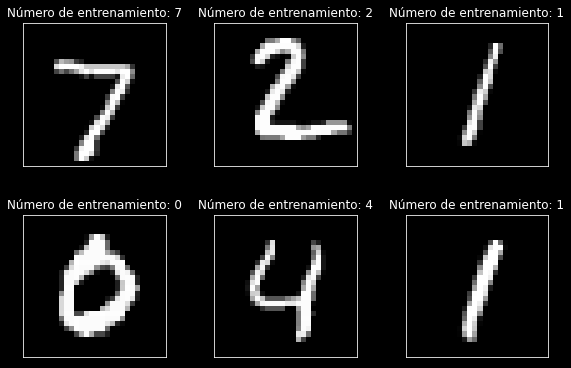

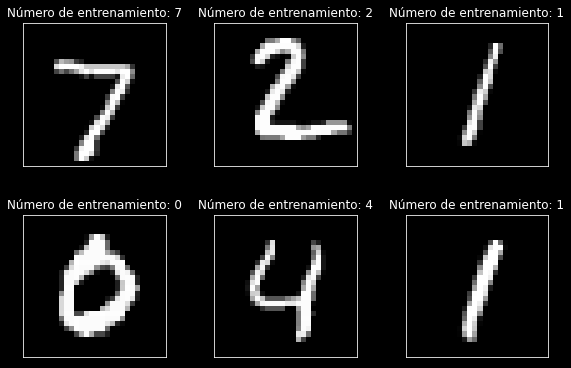

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Número de entrenamiento: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

**MNIST con Keras** 

Mostrar las predicciones de los números escritos a mano.

In [10]:
from keras.datasets import mnist
import keras.utils.np_utils as np_utils
import numpy as np
import matplotlib.pyplot as plt 


(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
Distribución de número en train: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Número: 0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54

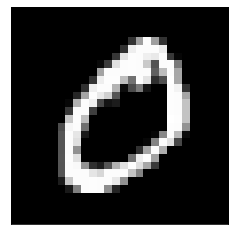

In [11]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

print("Distribución de número en train:", np.unique(y_train, return_counts=True))

idx=1


fig = plt.figure()
plt.imshow(X_train[idx], cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
fig


print(f"Número: {y_train[idx]}")

np.set_printoptions(linewidth=200)
print(X_train[idx,:,:])

Introducimos en la red neuronal la imagen en una dimensión

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
np.set_printoptions(linewidth=200)
print(X_train[idx,:])

print("Train forma:", X_train.shape)
print("Test forma:", X_test.shape)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  48. 238.
 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54. 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.
   0.   0.   0.   0.

Ayudamos a la red neuronal normalizando los datos

In [0]:
# Ayudamos normalizando los datos
X_train /= 255
X_test /= 255

queremos que la red neuronal nos devuelva la probabilidad de ser cada uno de los números, por lo tanto, necesitamos 10 columnas.

In [14]:
n_classes = 10
print("Forma antes de la codificación one-hot: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Forma después de la codificación one-hot: ", Y_train.shape)

print(y_train[idx])
print(Y_train[idx])

print("\n")
print(y_train[idx+1])
print(Y_train[idx+1])

Forma antes de la codificación one-hot:  (60000,)
Forma después de la codificación one-hot:  (60000, 10)
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**Construyendo el modelo**

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

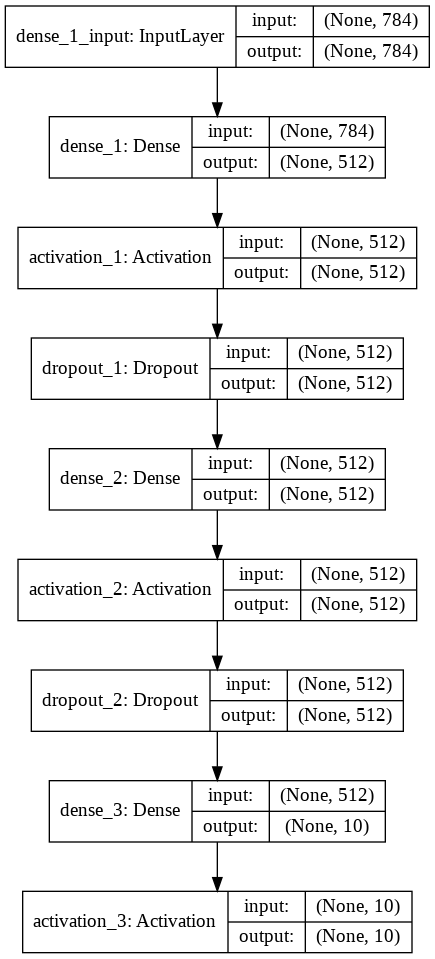

In [16]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='mnist_lin.png')
from IPython.display import Image
Image(retina=True, filename='mnist_lin.png')

**Entrenamiento**

**Optimizador:** 
El error que necesitamos ahora es el categorical `cross entropy`

**Adam:**
Es una mejora en velocidad de dos técnicas para mejorar el método del gradiente:

**Root Mean Square Propagation (RMSProp):** Learning rate para cada parámetro según la media de los valores vistos. **Adam utiliza también valores al cuadrado**

**Adaptive Gradient Algorithm (AdaGrad):** Learning rate para cada parámetro según lo enfrentado: actualiza poco lo visto con frecuencia y mucho lo no visto. Para problemas Sparse

En concreto, utiliza una media móvil exponencial del gradiente y del gradiente al cuadrado ($\beta_1$ y $\beta_2$ controlan el valor de cada media movil)

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')

**ENTRENAMIENTO**

In [18]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2501 - categorical_accuracy: 0.9247 - val_loss: 0.1146 - val_categorical_accuracy: 0.9643
Epoch 2/10
 - 2s - loss: 0.1002 - categorical_accuracy: 0.9686 - val_loss: 0.0769 - val_categorical_accuracy: 0.9756
Epoch 3/10
 - 2s - loss: 0.0714 - categorical_accuracy: 0.9768 - val_loss: 0.0714 - val_categorical_accuracy: 0.9774
Epoch 4/10
 - 2s - loss: 0.0567 - categorical_accuracy: 0.9822 - val_loss: 0.0624 - val_categorical_accuracy: 0.9813
Epoch 5/10
 - 2s - loss: 0.0471 - categorical_accuracy: 0.9847 - val_loss: 0.0745 - val_categorical_accuracy: 0.9795
Epoch 6/10
 - 2s - loss: 0.0386 - categorical_accuracy: 0.9869 - val_loss: 0.0651 - val_categorical_accuracy: 0.9796
Epoch 7/10
 - 2s - loss: 0.0322 - categorical_accuracy: 0.9895 - val_loss: 0.0672 - val_categorical_accuracy: 0.9809
Epoch 8/10
 - 2s - loss: 0.0305 - categorical_accuracy: 0.9897 - val_loss: 0.0726 - val_categorical_accuracy: 0.9818
Epoch 9/10
 - 

**Guardar un modelo**: se puede guardar en un fichero para ser recuperado después

In [19]:
model_name = 'keras_mnist.h5'
model.save(model_name)
print(f"Modelo guardado en {model_name}")

Modelo guardado en keras_mnist.h5


**Cargar un modelo**

Para recuperar de un archivo

In [20]:
from keras.models import load_model
mnist_model = load_model("keras_mnist.h5")
print(mnist_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

**Evaluación**

Probamos el modelo con los datos de test

In [21]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test pérdida", loss_and_metrics[0])
print("Test precisión", loss_and_metrics[1])

Test pérdida 0.07080201001656679
Test precisión 0.9835000038146973


In [22]:
#Una prediccion:
predicted_probs = mnist_model.predict_proba(X_test)
print(predicted_probs[0])


predicted_values = mnist_model.predict(X_test)
print(predicted_values[0])

predicted_classes = mnist_model.predict_classes(X_test)
print(predicted_classes[0])

[3.9523251e-10 7.4988975e-09 2.1931601e-10 3.8719310e-08 1.8544033e-11 4.6632970e-10 1.1077911e-13 9.9999964e-01 3.7080675e-10 3.4405977e-07]
[3.9523251e-10 7.4988975e-09 2.1931601e-10 3.8719310e-08 1.8544033e-11 4.6632970e-10 1.1077911e-13 9.9999964e-01 3.7080675e-10 3.4405977e-07]
7


Vamos a definir una función para pintar los aciertos y los errores con sus números

In [0]:
def pintar_numeros(predicted_classes, X_test, y_test,use_indices,cmap):
  # Reducimos el tamaño para que quepan los subplots
  plt.rcParams['figure.figsize'] = (8,8)
  plt.style.use('dark_background')

  figure_evaluation = plt.figure()

  # pintar graficos
  for i, use in enumerate(use_indices[:6]):
      plt.subplot(3,3,i+1)
      plt.imshow(X_test[use].reshape(28,28), cmap=cmap, interpolation='none')
      plt.title(
        "Predicción: {}, Verdad: {}".format(predicted_classes[use],
                                          y_test[use]))
      plt.xticks([])
      plt.yticks([])
      
  figure_evaluation
  
  
def pintar_predicciones(mnist_model,X_test,y_test):  
  predicted_classes = mnist_model.predict_classes(X_test)
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
  print()
  print(len(correct_indices)," bien clasificados")
  print(len(incorrect_indices)," mal clasificados")
  
  pintar_numeros(predicted_classes, X_test, y_test,correct_indices,'Greens')
  pintar_numeros(predicted_classes, X_test, y_test,incorrect_indices,'Reds')


9835  bien clasificados
165  mal clasificados


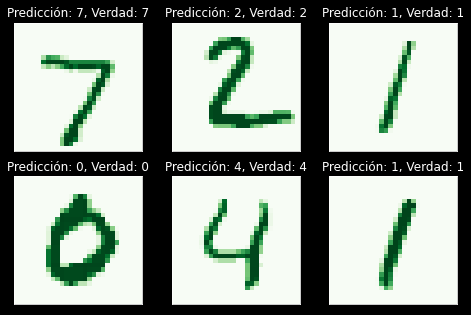

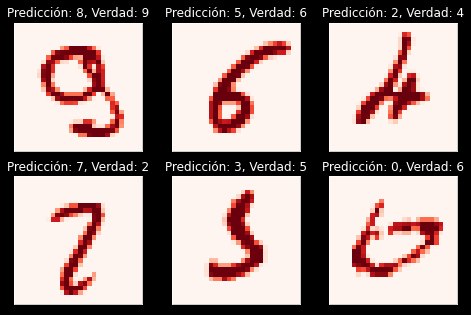

In [24]:
pintar_predicciones(mnist_model,X_test,y_test)